In [1]:
!pip install watson-machine-learning-client

  Using cached https://files.pythonhosted.org/packages/7f/99/ad6bd37e748257dd70d6f85d916cafe79c0b0f5e2e95b11f7fbc82bf3110/pytz-2023.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Running setup.py install for ibm-cos-sdk-core: started
    Running setup.py install for ibm-cos-sdk-core: finished with status 'done'
  Running setup.py install for ibm-cos-sdk-s3transfer: started
    Running setup.py install for ibm-cos-sdk-s3transfer: finished with status 'done'
  Running setup.py install for ibm-cos-sdk: started
    Running setup.py install for ibm-cos-sdk: finished with status 'done'


ERROR: ibm-cos-sdk-core 2.13.1 has requirement requests<3.0,>=2.31.0, but you'll have requests 2.28.1 which is incompatible.
ERROR: ibm-cos-sdk-core 2.13.1 has requirement urllib3<1.27,>=1.26.15, but you'll have urllib3 1.26.10 which is incompatible.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : ""
}
client = APIClient(wml_credentials)

ModuleNotFoundError: No module named 'ibm_watson_machine_learning'

In [ ]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client, 'Natural Disasters Intensity Analysis And Classification')
print('space uid: ' + space_uid)

space uid: c5a8fe50-8690-4da3-87b1-5849ad114d23


In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.repository.download('8cd312fd-ea3e-4925-896f-a5f5cd36cc89', 'natural_disaster.tar.gz')

Successfully saved model content to file: 'natural_disaster.tar.gz'


'G:\\SI-GuidedProject-49371-1652769290/natural_disaster.tar.gz'

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("model.h5")

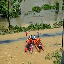

In [ ]:
img = image.load_img("C:/Users/Avish Shah/Desktop/dataset/dataset/test_set/Flood/1039.jpg", target_size = (64, 64))
img

In [ ]:
import numpy as np

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 23ms/step


array([2], dtype=int64)

In [ ]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Flood', dtype='<U5')